In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import shutil
import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [ ]:
# Listar os arquivos e subpastas
print(os.listdir(file_path_real))
print(os.listdir(file_path_fake))

['file1061.wav', 'file1059.wav', 'file1143.wav', 'file1115.wav', 'file1147.wav', 'file1135.wav', 'file1139.wav', 'file154.wav', 'file155.wav', 'file10.wav', 'file1.wav', 'file1047.wav', 'file1046.wav', 'file1048.wav', 'file1050.wav', 'file1049.wav', 'file1052.wav', 'file1053.wav', 'file1055.wav', 'file1054.wav', 'file1056.wav', 'file1057.wav', 'file1058.wav', 'file1060.wav', 'file1063.wav', 'file1065.wav', 'file1064.wav', 'file1067.wav', 'file1068.wav', 'file1069.wav', 'file1070.wav', 'file10735.wav', 'file10728.wav', 'file10737.wav', 'file10727.wav', 'file1072.wav', 'file10732.wav', 'file10734.wav', 'file1071.wav', 'file10736.wav', 'file1073.wav', 'file10746.wav', 'file10762.wav', 'file10741.wav', 'file10755.wav', 'file10750.wav', 'file10738.wav', 'file10740.wav', 'file10758.wav', 'file10744.wav', 'file10739.wav', 'file10754.wav', 'file10757.wav', 'file10743.wav', 'file10742.wav', 'file10759.wav', 'file10760.wav', 'file10745.wav', 'file10747.wav', 'file10763.wav', 'file10826.wav', 'fi

In [ ]:
# Função para processar os áudios em uma pasta
def process_audio_files(folder_path):

    for audio_file in os.listdir(folder_path):
        audio_path = os.path.join(folder_path, audio_file)

        # Carregar o áudio
        y, sr = librosa.load(audio_path, sr=None)

        # Mostrar informações do áudio
        print(f"Arquivo: {audio_file}, Duração: {len(y) / sr:.2f}s, Taxa de amostragem: {sr}Hz")

        # Plotar waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"Waveform de {audio_file}")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.show()

In [ ]:
# Processar áudios Real
#process_audio_files(file_path_real)

In [ ]:
# Processar áudios Fake
#process_audio_files(file_path_fake)

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Média dos coeficientes

# Carregar dados e rótulos
data = []
labels = []

# Processar Fake
for file_name in os.listdir(file_path_fake):
    file_path = os.path.join(file_path_fake, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(0)  # Rótulo 0 para Fake

# Processar Real
for file_name in os.listdir(file_path_real):
    file_path = os.path.join(file_path_real, file_name)
    features = extract_features(file_path)
    data.append(features)
    labels.append(1)  # Rótulo 1 para Real

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-310.484985,79.589180,12.035122,21.775892,7.463613,-4.327323,1.702638,5.056441,-11.605008,-8.825641,-12.136454,-8.166679,-7.886450,0
1,-292.760193,85.521347,-18.103905,14.233822,-1.934288,-8.300287,-15.360986,-14.333099,-0.524541,-12.453050,-2.744914,-14.212177,0.993812,0
2,-266.020477,106.608009,-11.326435,17.970966,-11.344944,1.250991,-5.587977,-6.984388,-5.437147,-10.668830,6.232262,-13.461805,6.319636,0
3,-260.005402,122.213196,-19.668991,8.698288,-10.487801,-3.308214,-5.397858,-11.390374,-4.951897,-11.585847,5.326418,-15.468590,5.036489,0
4,-270.677155,111.855637,-19.062414,5.179912,-16.694443,-4.503492,-10.268575,-12.212496,-1.401393,-12.573609,5.653296,-16.340860,3.830790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-296.089111,90.251648,49.353138,40.109879,13.949716,15.968038,-11.017990,1.806876,-6.369140,3.860376,-8.479083,-1.914927,-10.282051,1
555,-334.378174,76.736237,1.568514,22.846909,-14.486498,-16.314674,-15.556476,-21.469236,-20.530735,-1.497289,-14.830498,-3.666535,-10.663058,1
556,-323.235352,69.085464,4.084009,22.119936,-11.278208,-25.925304,-23.227936,-21.648048,-9.808347,-1.174033,-23.784948,1.368763,-17.619230,1
557,-312.793549,82.430946,3.129900,14.186769,-18.484079,-25.799473,-17.645624,-17.211958,-12.702026,-4.227543,-22.298204,0.184280,-17.449095,1


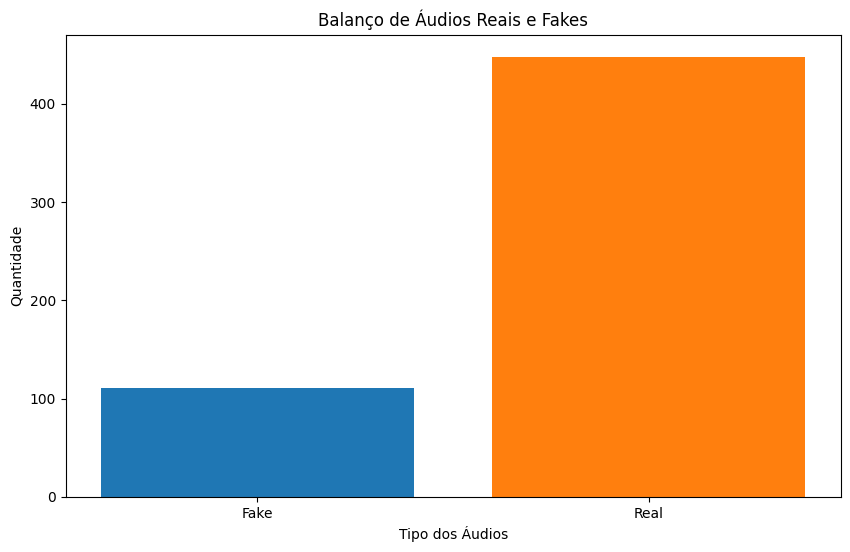

In [ ]:
# Contar as ocorrências de cada label
label_counts = [labels.count(0), labels.count(1)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))  # Ajuste do tamanho do gráfico
plt.bar([0, 1], label_counts, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])

# Adicionando rótulos e título
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definição do modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1456 - loss: 61.9237
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2856 - loss: 13.9949  
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 3.7946 
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 3.6022 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7406 - loss: 1.5720 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 1.0030 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8386 - loss: 0.6669 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8334 - loss: 0.6582 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8258 - loss: 0.6773 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8651 - loss: 0.4675
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.79
Precisão: 0.80
Recall: 0.94
F1-Score: 0.86


In [ ]:
# Treinando um modelo de regressão linear
model = RandomForestClassifier()
rfc = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rfc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.86
Recall: 1.00
F1-Score: 0.93


In [ ]:
# Treinando um modelo knc
model = KNeighborsClassifier()
knc = model.fit(X_train,y_train)

# Fazendo previsões no conjunto de teste
y_pred = knc.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.90
Precisão: 0.90
Recall: 0.98
F1-Score: 0.93


In [ ]:
model = XGBClassifier()
xgb = model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.88
Recall: 0.96
F1-Score: 0.92


In [ ]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)
LGBMC = model.fit(X_train, y_train)

y_pred = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 367, number of negative: 80
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1948
[LightGBM] [Info] Number of data points in the train set: 447, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.821029 -> initscore=1.523335
[LightGBM] [Info] Start training from score 1.523335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.92
Precisão: 0.92
Recall: 0.98
F1-Score: 0.95


In [ ]:
# Definição do modelo
input_shape = (X_train.shape[1],)  # Número de colunas do conjunto de treino
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predições e métricas
y_pred_proba = model.predict(X_test)  # Predições de probabilidade
y_pred = (y_pred_proba > 0.5).astype(int)  # Converter para rótulos binários

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5982 - loss: 4.0998
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7465 - loss: 3.2406 
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7333 - loss: 1.8591
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7253 - loss: 1.2188  
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8085 - loss: 0.6312 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8057 - loss: 0.5381 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8426 - loss: 0.5151 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8492 - loss: 0.5140 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8249 - loss: 0.5249 
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8308 - loss: 0.3986 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.86
Precisão: 0.87
Recall: 0.94
F1-Score: 0.90


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
DTC = model.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

In [ ]:
# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.88
Precisão: 0.87
Recall: 0.98
F1-Score: 0.92
